# Premier league 23/24 players and teams analysis

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Player Analysis:

In [2]:
players = pd.read_csv('csv/original csv/pl2324-players.csv')
players.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City


### Separate starters from substitutes for easier comparison:

In [3]:
# Reshape data for clustering
X = players["Starts"].values.reshape(-1, 1)

# Apply K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
players["Starter"] = kmeans.fit_predict(X)

players["Starter"] = players["Starter"].apply(lambda x: 1 if x == 0 else 0)


In [4]:
# Separate the dataset into Starters and Substitutes
starters = players[players["Starter"] == 1]
substitutes = players[players["Starter"] == 0]

print("Number of starters calculated: " + str(len(starters)) + " (Should be close to 220 out of 750)")

Number of starters calculated: 235 (Should be close to 220 out of 750)


### Compare and plot valuation stats to get some ideas about dataset:

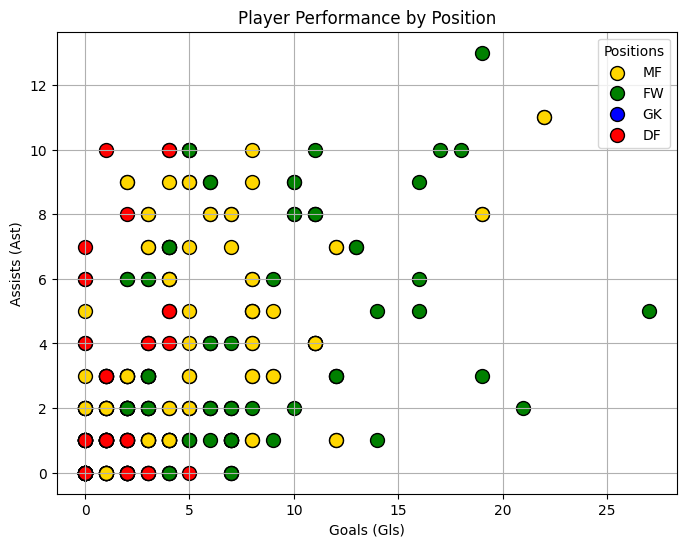

In [5]:
# Define fixed colors for specific positions
pos_colors = {
    "FW": "#008000",  # Green
    "MF": "#FFD700",  # Yellow
    "DF": "#FF0000",  # Red
    "GK": "#0000FF"   # Blue
}

# Plot
plt.figure(figsize=(8, 6))
for _, row in starters.iterrows():
    positions = row['Pos'].split(',')
    x, y = row['Gls'], row['Ast']
    for pos in positions:
        if pos in pos_colors:  # Ensure only defined positions get colors
            plt.scatter(x, y, color=pos_colors[pos], label=pos, edgecolors='black', s=100)

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
unique_legend = dict(zip(labels, handles))  # Remove duplicates
plt.legend(unique_legend.values(), unique_legend.keys(), title="Positions")

plt.xlabel("Goals (Gls)")
plt.ylabel("Assists (Ast)")
plt.title("Player Performance by Position")
plt.grid(True)
plt.show()

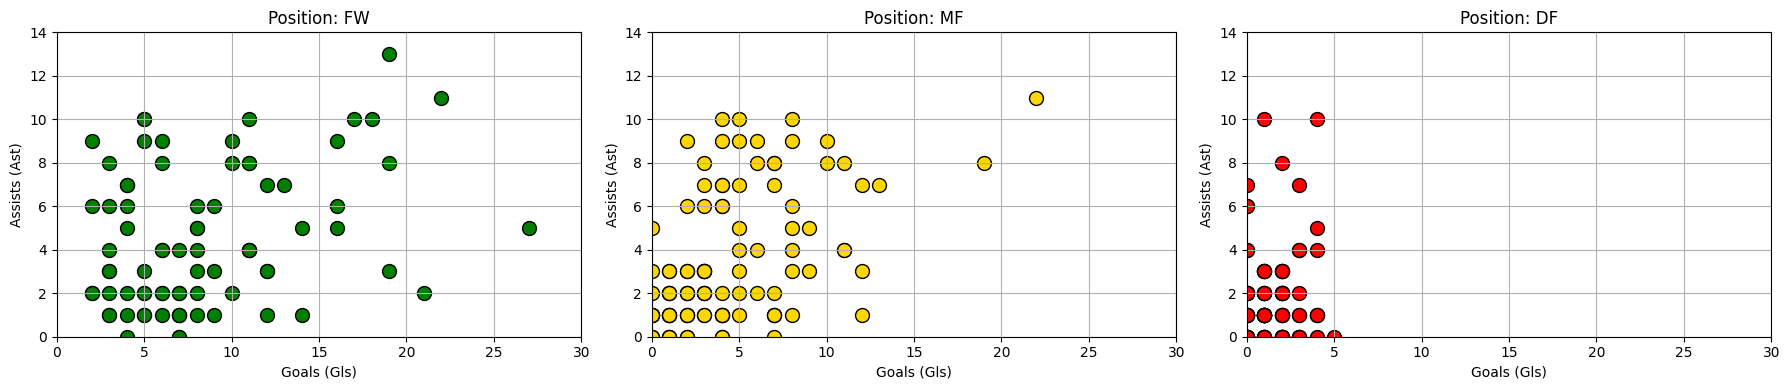

In [6]:
# Define the desired order for positions: Green (FW), Yellow (MF), Red (DF)
position_order = ["FW", "MF", "DF"]
unique_positions = ["FW", "MF", "DF"]

# Filter out "GK" and reorder positions
filtered_positions = [pos for pos in position_order if pos in unique_positions]

# Create subplots dynamically based on the number of filtered positions
fig, axes = plt.subplots(1, len(filtered_positions), figsize=(6 * len(filtered_positions), 4))

# If there's only one position, wrap `axes` in a list to avoid indexing errors
if len(filtered_positions) == 1:
    axes = [axes]

# Iterate over each valid position and plot on the corresponding subplot
for ax, pos in zip(axes, filtered_positions):
    for _, row in starters.iterrows():
        positions = row['Pos'].split(',')
        x, y = row['Gls'], row['Ast']
        if pos in positions:  # Only plot if player plays this position
            ax.scatter(x, y, color=pos_colors[pos], edgecolors='black', s=100)

    # Set consistent axis limits
    ax.set_xlim(0, 30)  # Goals (Gls) limit
    ax.set_ylim(0, 14)  # Assists (Ast) limit

    # Set labels and title
    ax.set_xlabel("Goals (Gls)")
    ax.set_ylabel("Assists (Ast)")
    ax.set_title(f"Position: {pos}")
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

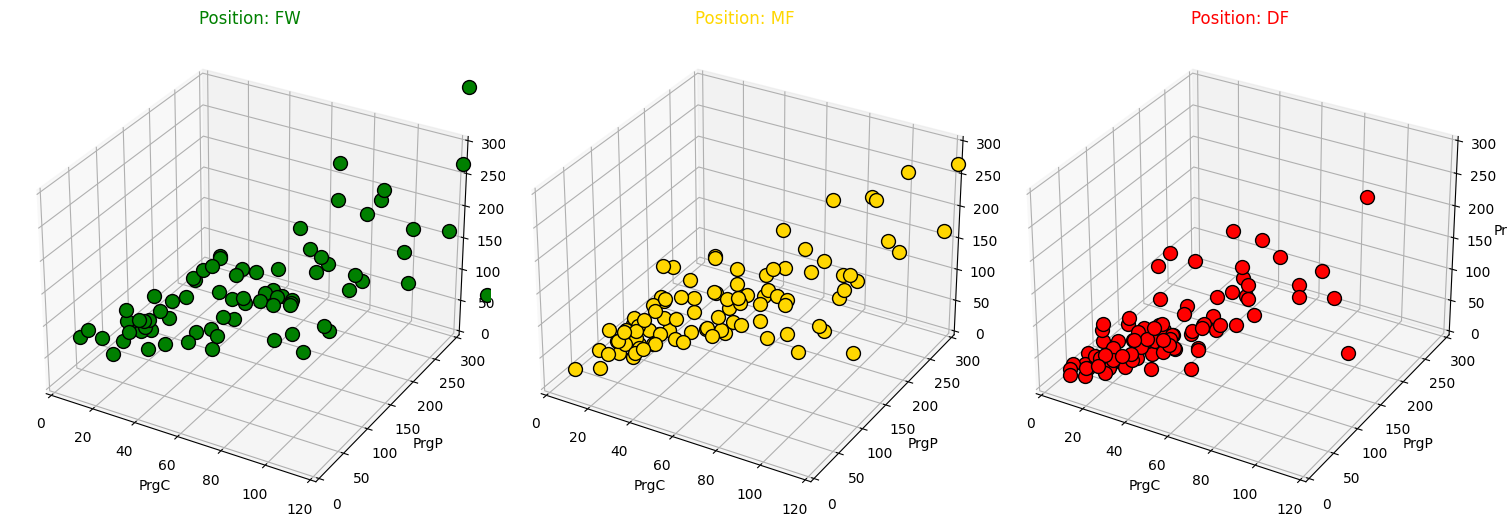

In [7]:
# Create subplots with 1 row and as many columns as there are filtered positions
fig, axes = plt.subplots(1, len(filtered_positions), figsize=(5 * len(filtered_positions), 6), subplot_kw={'projection': '3d'})

# Ensure axes is always iterable (in case of only one subplot)
if len(filtered_positions) == 1:
    axes = [axes]

# Iterate over each position in the correct order
for ax, pos in zip(axes, filtered_positions):
    filtered_players = starters[starters["Pos"].str.contains(pos)]  # Filter players by position

    for _, row in filtered_players.iterrows():
        x, y, z = row['PrgC'], row['PrgP'], row['PrgR']
        ax.scatter(x, y, z, color=pos_colors[pos], edgecolors='black', s=100)

    ax.set_xlim(0, 120)  # Set limits for X-axis
    ax.set_ylim(0, 300)  # Set limits for Y-axis
    ax.set_zlim(0, 300)  # Set limits for Z-axis

    # Set labels and title
    ax.set_xlabel("PrgC")
    ax.set_ylabel("PrgP")
    ax.set_zlabel("PrgR")
    ax.set_title(f"Position: {pos}", color=pos_colors[pos])  # Title in position color

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


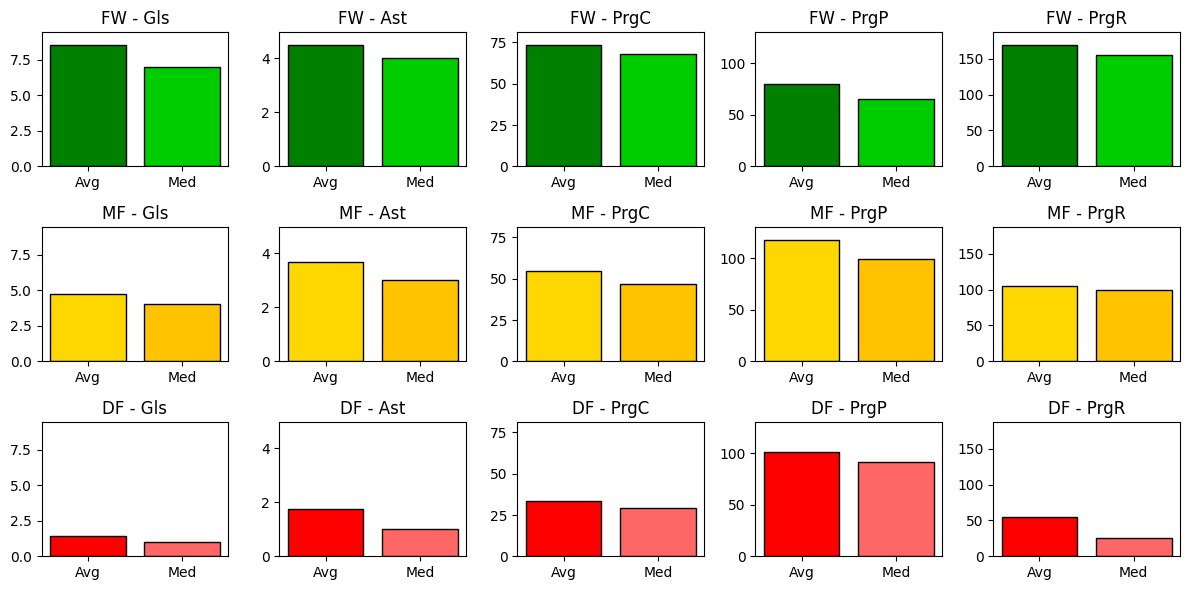

In [12]:
# Define colors for positions
position_colors = {
    "FW": ("#008000", "#00CC00"),  # Green (FW)
    "MF": ("#FFD700", "#FFC300"),  # Yellow (MF)
    "DF": ("#FF0000", "#FF6666")   # Red (DF)
}

# Define columns to analyze
columns = ["Gls", "Ast", "PrgC", "PrgP", "PrgR"]

# Filter dataset by positions and enforce order
positions_data = {pos: starters[starters["Pos"].str.contains(pos)].copy() for pos in position_order}

# Find max values across all positions for each column
max_limits = {col: max(
    positions_data["FW"][col].mean(), positions_data["FW"][col].median(),
    positions_data["MF"][col].mean(), positions_data["MF"][col].median(),
    positions_data["DF"][col].mean(), positions_data["DF"][col].median()
) for col in columns}

# Create subplots: One row for each position, columns for each metric
fig, axes = plt.subplots(len(position_order), len(columns), figsize=(12, 6), sharey=False)

# Ensure axes is a 2D array even if only one row
if len(position_order) == 1:
    axes = [axes]

# Iterate over each position in the correct order
for row_idx, pos in enumerate(position_order):
    data = positions_data[pos]
    avg_values = data[columns].mean()
    med_values = data[columns].median()
    dark_color, light_color = position_colors[pos]  # Get color shades

    # Iterate over each column to plot avg & median
    for col_idx, col in enumerate(columns):
        ax = axes[row_idx, col_idx]
        ax.bar("Avg", avg_values[col], color=dark_color, edgecolor="black")
        ax.bar("Med", med_values[col], color=light_color, edgecolor="black")

        ax.set_title(f"{pos} - {col}")
        ax.set_ylim(0, max_limits[col] * 1.1)  # Set limit slightly above max value

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

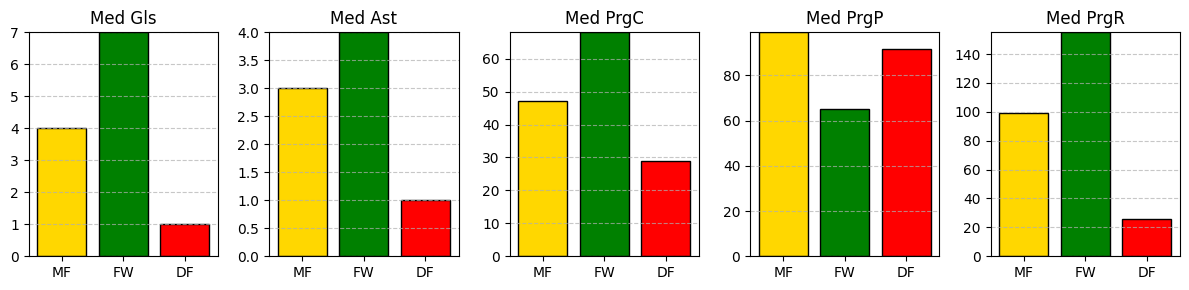

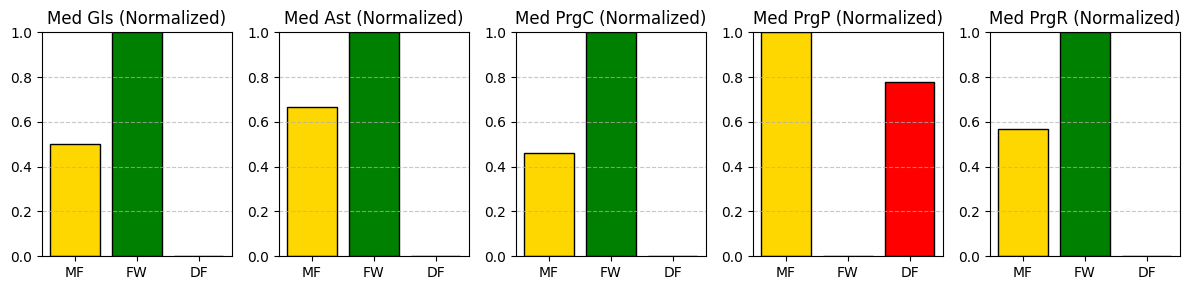

In [15]:
# Define colors for positions
position_colors = {
    "MF": "#FFD700",  # Yellow
    "FW": "#008000",  # Green
    "DF": "#FF0000"   # Red
}

# Define columns to analyze
columns = ["Gls", "Ast", "PrgC", "PrgP", "PrgR"]

# Compute median values per position (before normalization)
median_values = {
    col: {pos: positions_data[pos][col].median() for pos in positions_data}
    for col in columns
}

# Convert to DataFrame for easy manipulation
median_df = pd.DataFrame(median_values)

# Normalize the medians (each metric separately)
scaler = MinMaxScaler()
median_df_norm = pd.DataFrame(scaler.fit_transform(median_df), columns=columns, index=median_df.index)

# Create figure for non-normalized medians (above)
fig2, axes2 = plt.subplots(1, len(columns), figsize=(12, 3), sharey=False)
for col_idx, col in enumerate(columns):
    ax = axes2[col_idx]
    for pos, color in position_colors.items():
        ax.bar(pos, median_df.loc[pos, col], color=color, edgecolor="black")
    ax.set_title(f"Med {col}")
    ax.set_ylim(0, median_df[col].max())  # Set y-axis limit to the max of the actual medians
    ax.grid(axis='y', linestyle='--', alpha=0.7)

fig2.tight_layout()

# Create figure for normalized medians (below)
fig1, axes1 = plt.subplots(1, len(columns), figsize=(12, 3), sharey=False)
for col_idx, col in enumerate(columns):
    ax = axes1[col_idx]
    for pos, color in position_colors.items():
        ax.bar(pos, median_df_norm.loc[pos, col], color=color, edgecolor="black")
    ax.set_title(f"Med {col} (Normalized)")
    ax.set_ylim(0, 1)  # Normalized scale (0 to 1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

fig1.tight_layout()

# Show both figures one above the other
plt.show()


### Conclusion:
###     - Data available defines mostly attacking and midfield part of player stats.
###     - In almost all categories attackers are dominant with exception of progressive passes that are more common for defenders and midfielders.
###     - Defenders would be better evaluated with data like number of tackles and retakes.

# Team analysis:

In [16]:
teams_by_matches = pd.read_csv('csv/original csv/pl2324-matches.csv')
teams_by_matches.head()

,round_number,league_name,name,starting_at,home_team_name,away_team_name,home_team_goals,away_team_goals
0,1,Premier League,Burnley vs Manchester City,8/11/2023,Burnley,Manchester City,0,3
1,1,Premier League,Arsenal vs Nottingham Forest,8/12/2023,Arsenal,Nottingham Forest,2,1
2,1,Premier League,AFC Bournemouth vs West Ham United,8/12/2023,AFC Bournemouth,West Ham United,1,1
3,1,Premier League,Brighton & Hove Albion vs Luton Town,8/12/2023,Brighton & Hove Albion,Luton Town,4,1
4,1,Premier League,Everton vs Fulham,8/12/2023,Everton,Fulham,0,1


### Make team stats dataset from players and matches data:

In [19]:
# Create a list to store results for each team
team_stats = []

# Process each match from both home and away perspectives
for _, row in teams_by_matches.iterrows():
    home_team = row['home_team_name']
    away_team = row['away_team_name']
    home_goals = row['home_team_goals']
    away_goals = row['away_team_goals']

    # Home team perspective
    team_stats.append({
        'team_name': home_team,
        'home_wins': int(home_goals > away_goals),
        'home_draws': int(home_goals == away_goals),
        'home_loses': int(home_goals < away_goals),
        'away_wins': 0,
        'away_draws': 0,
        'away_loses': 0,
    })

    # Away team perspective
    team_stats.append({
        'team_name': away_team,
        'home_wins': 0,
        'home_draws': 0,
        'home_loses': 0,
        'away_wins': int(away_goals > home_goals),
        'away_draws': int(away_goals == home_goals),
        'away_loses': int(away_goals < home_goals),
    })

# Convert to DataFrame
stats_df = pd.DataFrame(team_stats)

# Group by team_name and sum statistics
final_stats = stats_df.groupby('team_name', as_index=False).sum()

# Add combined totals
final_stats['team_wins'] = final_stats['home_wins'] + final_stats['away_wins']
final_stats['team_draws'] = final_stats['home_draws'] + final_stats['away_draws']
final_stats['team_loses'] = final_stats['home_loses'] + final_stats['away_loses']

# Sort by total wins
final_stats = final_stats.sort_values(by='team_wins', ascending=False).reset_index(drop=True)

# Show result
final_stats.head()

,team_name,home_wins,home_draws,home_loses,away_wins,away_draws,away_loses,team_wins,team_draws,team_loses
0,Arsenal,15,2,2,13,3,3,28,5,5
1,Manchester City,14,5,0,14,2,3,28,7,3
2,Liverpool,15,3,1,9,7,3,24,10,4
3,Aston Villa,12,4,3,8,4,7,20,8,10
4,Tottenham Hotspur,13,0,6,7,6,6,20,6,12


In [20]:
team_aggregates = players.groupby("Team")[["Gls", "Ast", "PrgC", "PrgP", "PrgR"]].sum().reset_index()

team_aggregates["Team"] = team_aggregates["Team"].replace({
    "Bournemouth": "AFC Bournemouth",
    "Brighton": "Brighton & Hove Albion",
    "Wolverhampton": "Wolverhampton Wanderers"
})

# Rename column to match final_stats
team_aggregates.rename(columns={"Team": "team_name"}, inplace=True)

# Merge into final_stats
final_stats = final_stats.merge(team_aggregates, on="team_name", how="left")

final_stats.head()

,team_name,home_wins,home_draws,home_loses,away_wins,away_draws,away_loses,team_wins,team_draws,team_loses,Gls,Ast,PrgC,PrgP,PrgR
0,Arsenal,15,2,2,13,3,3,28,5,5,86.0,62.0,821.0,2106.0,2088.0
1,Manchester City,14,5,0,14,2,3,28,7,3,94.0,69.0,1127.0,2060.0,2032.0
2,Liverpool,15,3,1,9,7,3,24,10,4,80.0,60.0,924.0,2110.0,2091.0
3,Aston Villa,12,4,3,8,4,7,20,8,10,72.0,55.0,775.0,1451.0,1438.0
4,Tottenham Hotspur,13,0,6,7,6,6,20,6,12,69.0,58.0,957.0,2107.0,2097.0


In [21]:
final_stats["points"] = final_stats["team_wins"] * 3 + final_stats["team_draws"] * 1

final_stats = final_stats.sort_values(by="points", ascending=False).reset_index(drop=True)

final_stats.head()

,team_name,home_wins,home_draws,home_loses,away_wins,away_draws,away_loses,team_wins,team_draws,team_loses,Gls,Ast,PrgC,PrgP,PrgR,points
0,Manchester City,14,5,0,14,2,3,28,7,3,94.0,69.0,1127.0,2060.0,2032.0,91
1,Arsenal,15,2,2,13,3,3,28,5,5,86.0,62.0,821.0,2106.0,2088.0,89
2,Liverpool,15,3,1,9,7,3,24,10,4,80.0,60.0,924.0,2110.0,2091.0,82
3,Aston Villa,12,4,3,8,4,7,20,8,10,72.0,55.0,775.0,1451.0,1438.0,68
4,Tottenham Hotspur,13,0,6,7,6,6,20,6,12,69.0,58.0,957.0,2107.0,2097.0,66


In [22]:
final_stats.to_csv("csv/processed csv/pl2324-teams.csv", index=False)

### Explore team stats data:

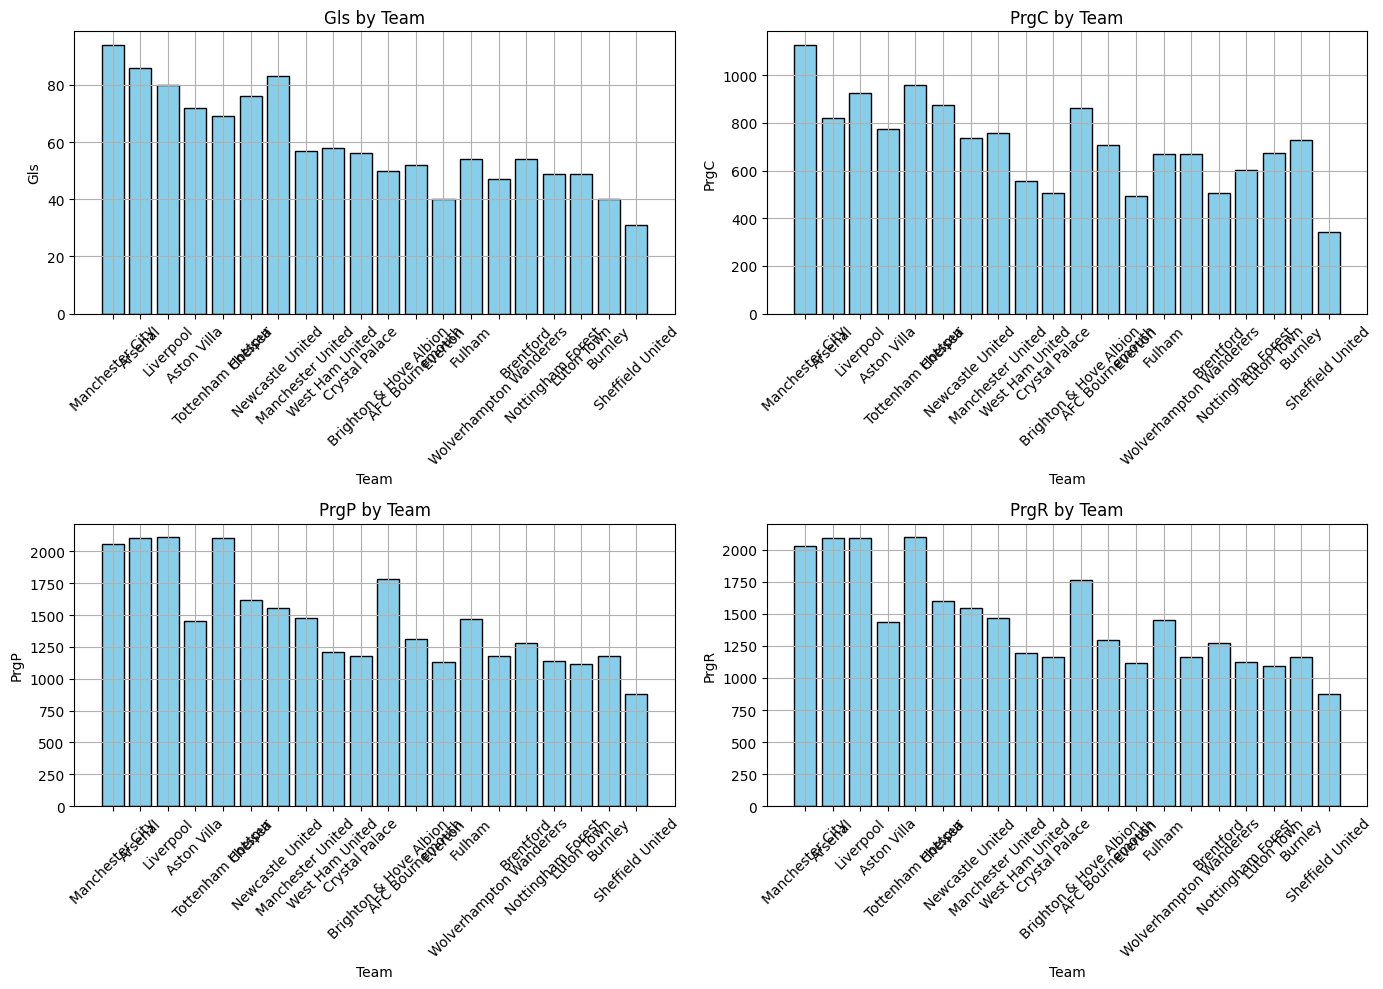

In [23]:
# Define the columns for the stats
stats_columns = ['Gls', 'PrgC', 'PrgP', 'PrgR']

# Create subplots: one for each stat (4 subplots)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Iterate over the stats columns and plot
for i, stat in enumerate(stats_columns):
    ax = axes[i]

    # Plot the stat by team
    ax.bar(final_stats['team_name'], final_stats[stat], color='skyblue', edgecolor='black')

    # Set titles and labels
    ax.set_title(f"{stat} by Team")
    ax.set_xlabel("Team")
    ax.set_ylabel(stat)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    ax.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Players evaluation

#### Key metrics: FW - Gls Ast, MF - Ast PrgP PrgC, DF - PrgP PrgC

In [24]:
FW_df = players[players['Pos'].str.contains('FW', na=False)].copy()
MF_df = players[players['Pos'].str.contains('MF', na=False)].copy()
DF_df = players[players['Pos'].str.contains('DF', na=False)].copy()

FW_df.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team,Starter
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City,1
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City,1
5,Bernardo Silva,pt POR,"MF,FW",28.0,33,29,2578.0,28.6,6.0,9.0,...,0.52,0.21,0.52,0.13,0.27,0.40,0.13,0.40,Manchester City,1
6,Erling Haaland,no NOR,FW,23.0,31,29,2552.0,28.4,27.0,5.0,...,1.13,0.71,0.88,1.03,0.15,1.18,0.81,0.96,Manchester City,1
11,Jeremy Doku,be BEL,"FW,MF",21.0,29,18,1595.0,17.7,3.0,8.0,...,0.62,0.17,0.62,0.14,0.26,0.40,0.14,0.40,Manchester City,1


In [30]:
FW_df['Performance'] = MinMaxScaler((0, 100)).fit_transform(FW_df[['G+A']])

FW_df.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team,Starter,Performance
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City,1,81.818182
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City,1,57.575758
5,Bernardo Silva,pt POR,"MF,FW",28.0,33,29,2578.0,28.6,6.0,9.0,...,0.21,0.52,0.13,0.27,0.40,0.13,0.40,Manchester City,1,45.454545
6,Erling Haaland,no NOR,FW,23.0,31,29,2552.0,28.4,27.0,5.0,...,0.71,0.88,1.03,0.15,1.18,0.81,0.96,Manchester City,1,96.969697
11,Jeremy Doku,be BEL,"FW,MF",21.0,29,18,1595.0,17.7,3.0,8.0,...,0.17,0.62,0.14,0.26,0.40,0.14,0.40,Manchester City,1,33.333333


In [32]:
MF_df['Ast'] = MinMaxScaler((0, 100)).fit_transform(MF_df[['Ast']])
MF_df['PrgP'] = MinMaxScaler((0, 100)).fit_transform(MF_df[['PrgP']])
MF_df['PrgC'] = MinMaxScaler((0, 100)).fit_transform(MF_df[['PrgC']])

MF_df['Performance'] = MF_df[['Ast', 'PrgP', 'PrgC']].mean(axis=1)

MF_df['Performance'] = MinMaxScaler((0, 100)).fit_transform(MF_df[['Performance']])

MF_df.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team,Starter,Performance
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,81.818182,...,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City,1,96.671298
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,72.727273,...,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City,1,71.414095
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,72.727273,...,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City,1,57.766476
5,Bernardo Silva,pt POR,"MF,FW",28.0,33,29,2578.0,28.6,6.0,81.818182,...,0.21,0.52,0.13,0.27,0.40,0.13,0.40,Manchester City,1,86.156634
8,Manuel Akanji,ch SUI,"DF,MF",28.0,30,28,2511.0,27.9,2.0,0.000000,...,0.07,0.07,0.07,0.02,0.09,0.07,0.09,Manchester City,1,26.975192


In [34]:
DF_df['PrgP'] = MinMaxScaler((0, 100)).fit_transform(DF_df[['PrgP']])
DF_df['PrgC'] = MinMaxScaler((0, 100)).fit_transform(DF_df[['PrgC']])

DF_df['Performance'] = DF_df[['PrgP', 'PrgC']].mean(axis=1)

DF_df['Performance'] = MinMaxScaler((0, 100)).fit_transform(DF_df[['Performance']])

DF_df.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team,Starter,Performance
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City,1,66.677704
7,Rúben Dias,pt POR,DF,26.0,30,28,2559.0,28.4,0.0,0.0,...,0.00,0.00,0.05,0.01,0.06,0.05,0.06,Manchester City,1,50.834122
8,Manuel Akanji,ch SUI,"DF,MF",28.0,30,28,2511.0,27.9,2.0,0.0,...,0.07,0.07,0.07,0.02,0.09,0.07,0.09,Manchester City,1,51.542100
9,Joško Gvardiol,hr CRO,DF,21.0,28,26,2328.0,25.9,4.0,1.0,...,0.15,0.19,0.12,0.06,0.18,0.12,0.18,Manchester City,1,57.234311
10,Nathan Aké,nl NED,DF,28.0,29,24,2042.0,22.7,2.0,2.0,...,0.09,0.18,0.11,0.05,0.16,0.11,0.16,Manchester City,1,34.657837


In [36]:
# Select only necessary columns from each dataframe
fw_perf = FW_df[['Player', 'Pos', 'Performance', 'Team']]
mf_perf = MF_df[['Player', 'Pos', 'Performance', 'Team']]
df_perf = DF_df[['Player', 'Pos', 'Performance', 'Team']]

# Concatenate the three dataframes
combined_perf = pd.concat([fw_perf, mf_perf, df_perf])

# Group by player to handle duplicates (average performance and merge positions)
final_perf = (
    combined_perf
    .groupby('Player')
    .agg({
        'Performance': 'mean',
        'Pos': lambda x: ','.join(sorted(set(p.strip() for v in x for p in v.split(',')))),
        'Team': 'first'
    })
    .reset_index()
)

# Optional: round performance if you want cleaner numbers
final_perf['Performance'] = final_perf['Performance'].round(2)
final_perf = final_perf.sort_values(by='Performance', ascending=False).reset_index(drop=True)

final_perf.head()

,Player,Performance,Pos,Team
0,Martin Ødegaard,100.00,MF,Arsenal
1,Erling Haaland,96.97,FW,Manchester City
2,Ollie Watkins,96.97,FW,Aston Villa
3,Pascal Groß,96.69,"DF,MF",Brighton
4,Rodri,96.67,MF,Manchester City


# Home vs Away team performance

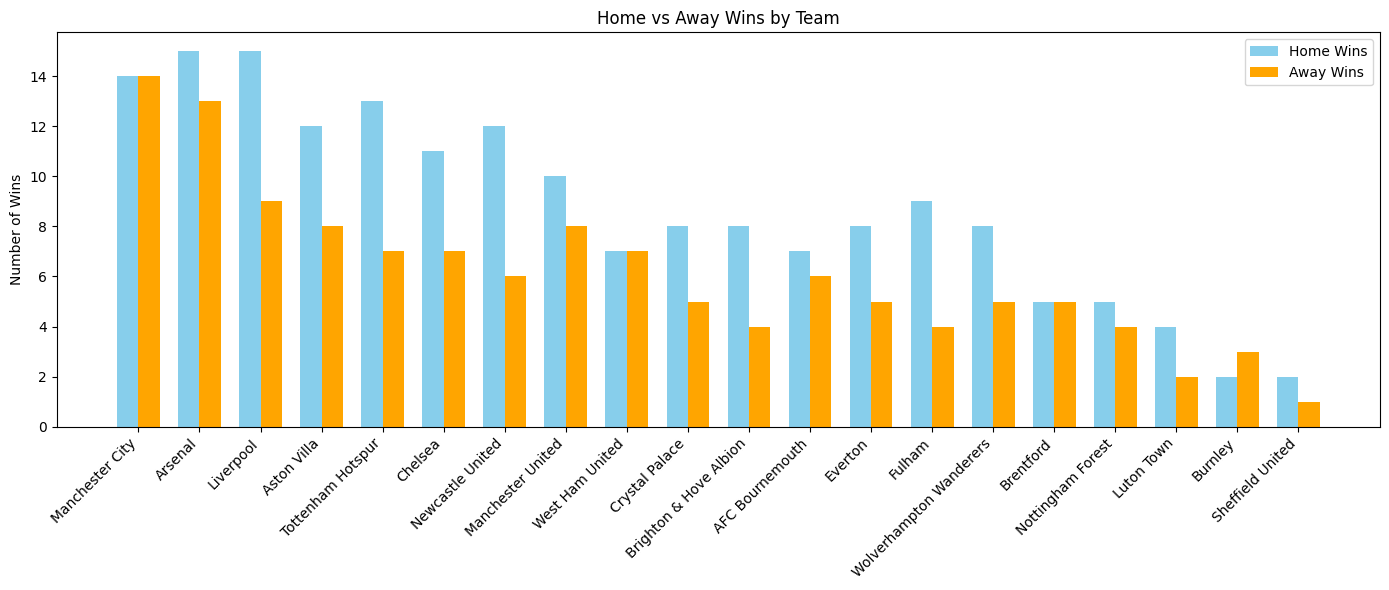

In [39]:
teams = final_stats['team_name']
home_wins = final_stats['home_wins']
away_wins = final_stats['away_wins']

x = np.arange(len(teams))  # the label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(14, 6))
rects1 = ax.bar(x - width/2, home_wins, width, label='Home Wins', color='skyblue')
rects2 = ax.bar(x + width/2, away_wins, width, label='Away Wins', color='orange')

# Add labels and formatting
ax.set_ylabel('Number of Wins')
ax.set_title('Home vs Away Wins by Team')
ax.set_xticks(x)
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

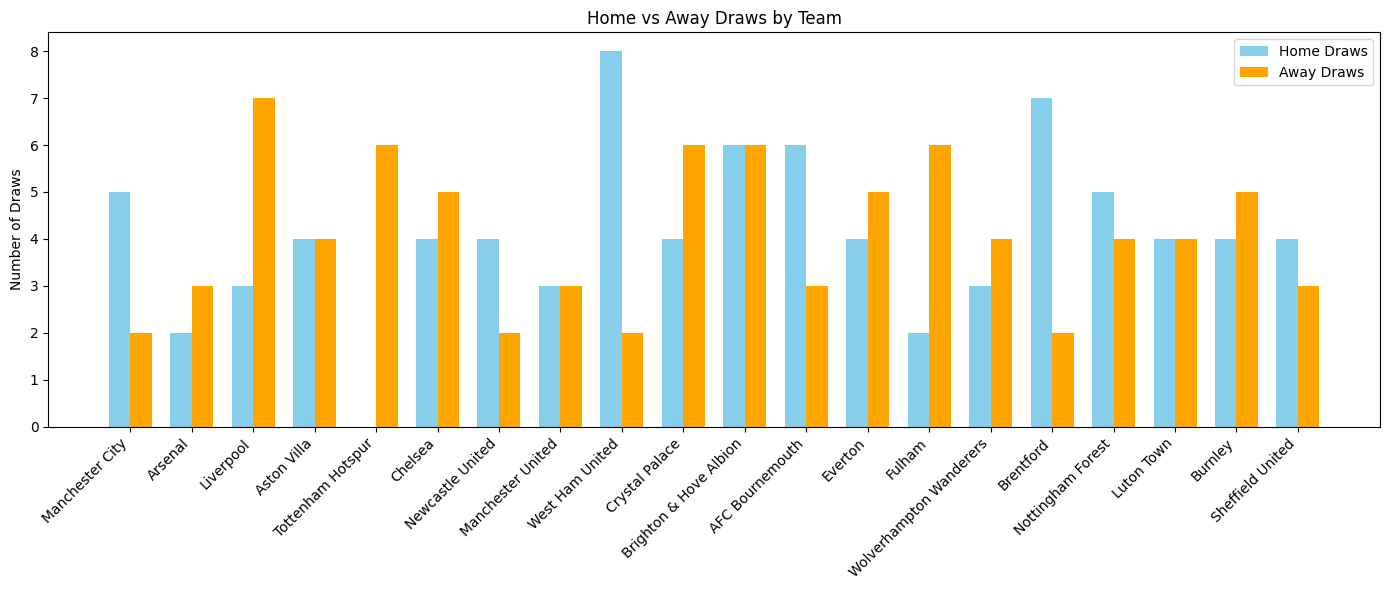

In [40]:
home_draws = final_stats['home_draws']
away_draws = final_stats['away_draws']

fig, ax = plt.subplots(figsize=(14, 6))
rects1 = ax.bar(x - width/2, home_draws, width, label='Home Draws', color='skyblue')
rects2 = ax.bar(x + width/2, away_draws, width, label='Away Draws', color='orange')

# Add labels and formatting
ax.set_ylabel('Number of Draws')
ax.set_title('Home vs Away Draws by Team')
ax.set_xticks(x)
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [43]:
# Calculate percentage difference directly
final_stats['home_advantage_percent'] = 100 - 100 * final_stats['away_wins'] / final_stats['home_wins']

# Calculate the average percentage difference
average_home_advantage = final_stats['home_advantage_percent'].mean()

print(f"On average, teams win {average_home_advantage:.2f}% more at home than away.")


On average, teams win 27.08% more at home than away.


# How age affects performance

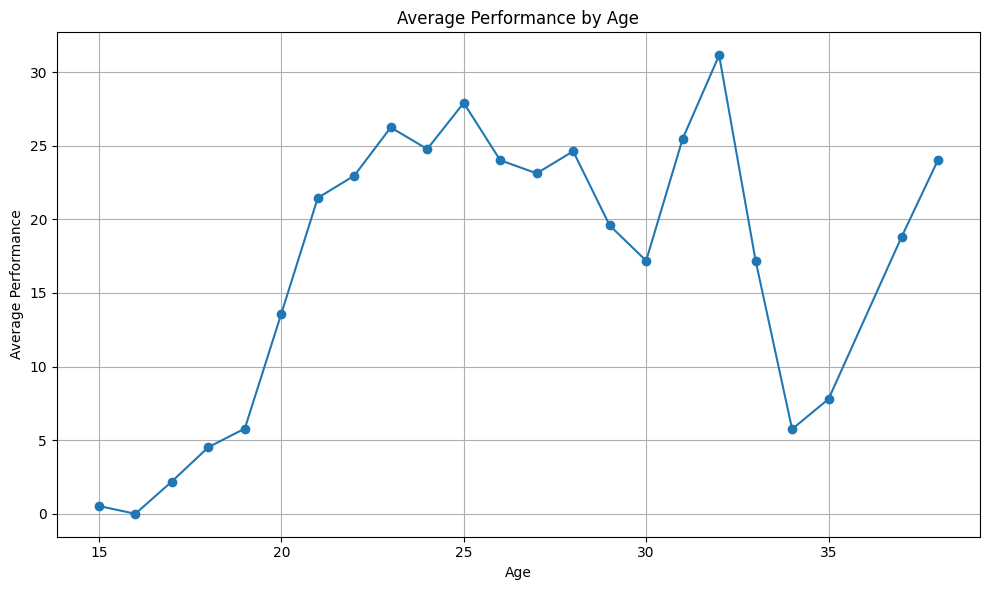

In [44]:
# Merge age into final_perf
final_perf = final_perf.merge(players[['Player', 'Age']], on='Player', how='left')

# Group by Age and calculate average performance
performance_by_age = final_perf.groupby('Age')['Performance'].mean().reset_index()

# Sort by Age
performance_by_age = performance_by_age.sort_values(by='Age')

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(performance_by_age['Age'], performance_by_age['Performance'], marker='o')
plt.title('Average Performance by Age')
plt.xlabel('Age')
plt.ylabel('Average Performance')
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
# Count players with age > 30
num_above_30 = final_perf[final_perf['Age'] > 30].shape[0]
print(f"Number of players with age above 30: {num_above_30}")

Number of players with age above 30: 61


### Peek of performance is at age 25, and after that it gradually falls downwards, with fluctuations on players above 30, that are roughly 8% of the league participants due to outliers